# Multiple Linear Regression

**Problem Statement:**

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

So **interpretation** is important!

### Importing necessary libraries

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Data loading

In [2]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Data visualisation 

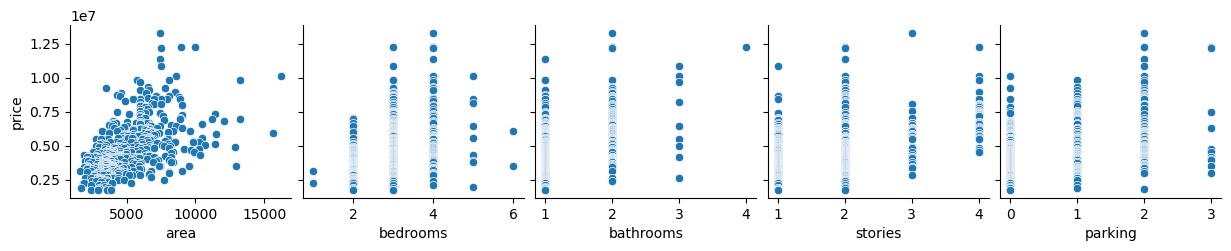

In [5]:
# visualise numeric columns

target_var = ['price']
numeric_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

sns.pairplot(data = data, x_vars = numeric_vars, y_vars = target_var)
plt.show()

From above scatter plots we can observe that there is atleast some columns where a positive correlation is present between numeric variables and a target variable, hence we can use linear regression here.

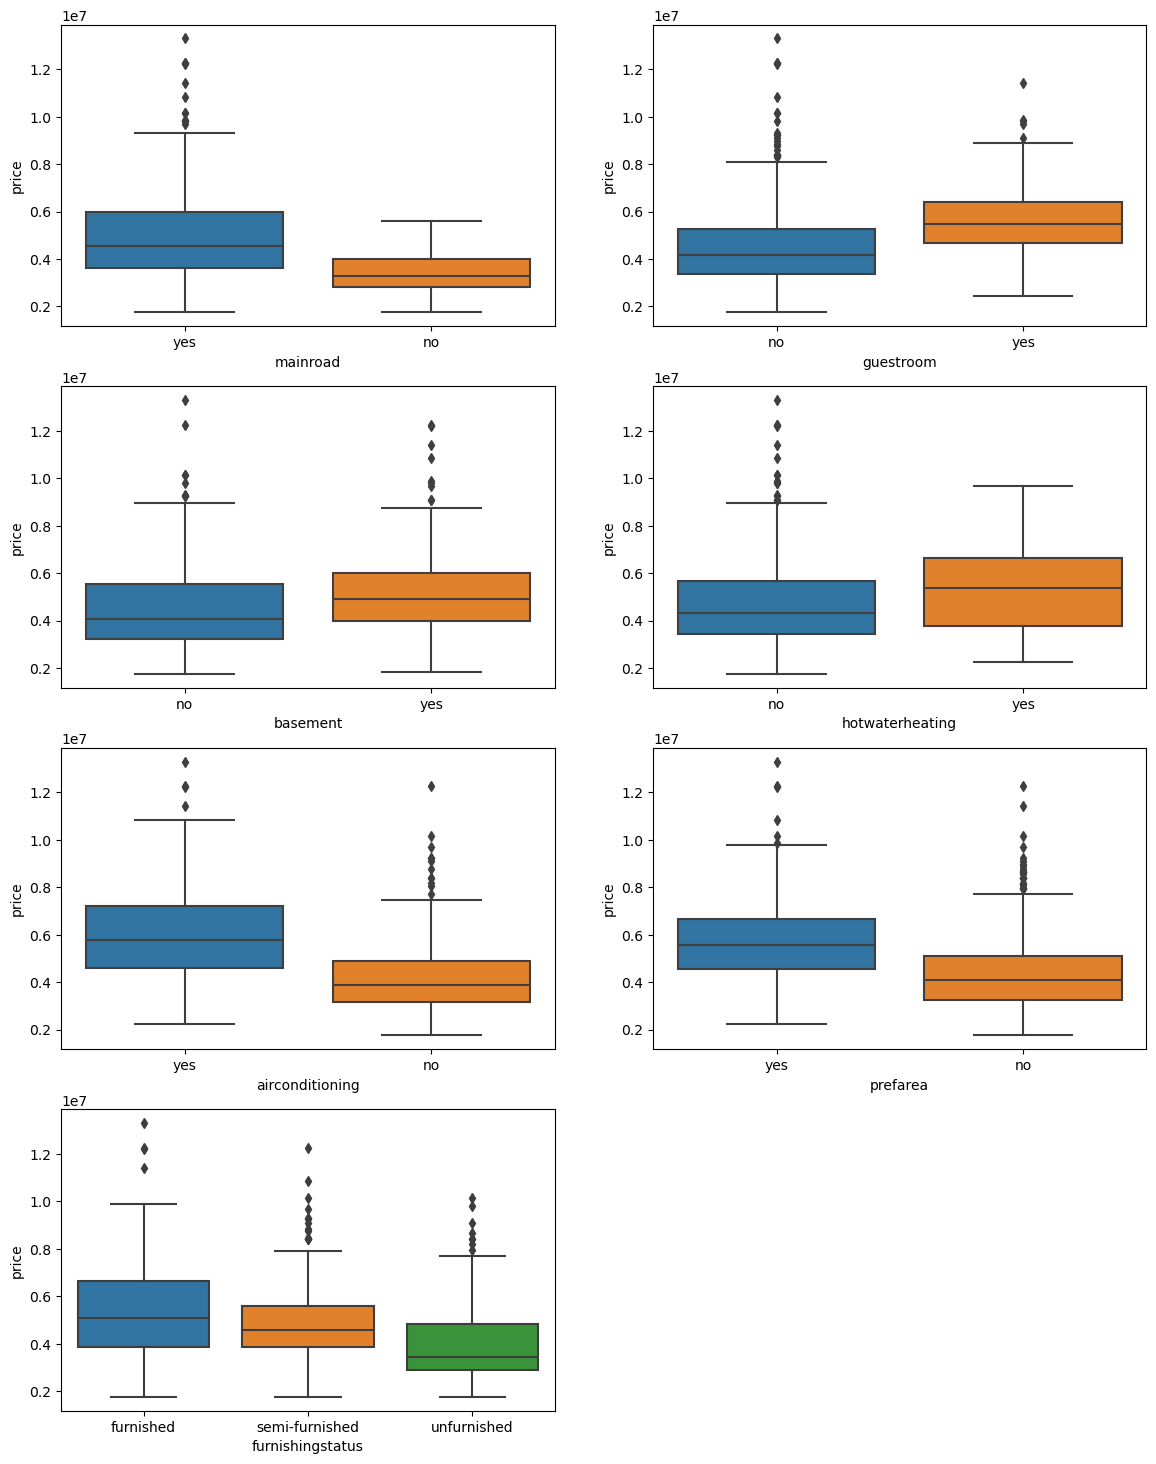

In [6]:
# visualise categorical columns

categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
plt.figure(figsize=(14, 18))

for i in range(0, len(categorical_vars)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=data, x=categorical_vars[i], y=target_var[0])

plt.show()

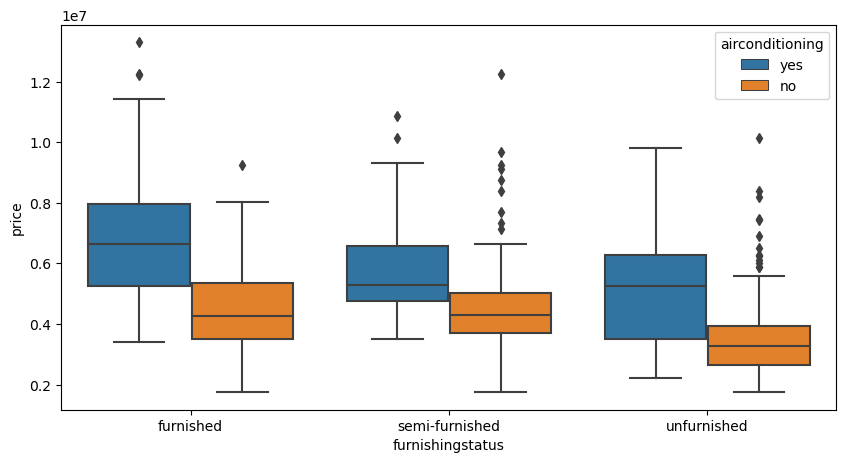

In [7]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = data)
plt.show()

### Data prepration

#### Step1: Encode all binary variables to 0/1

In [8]:
binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[binary_vars] = data[binary_vars].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [9]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


#### Step2: Create dummy variables for furnishing status column

In [10]:
data = pd.get_dummies(data, columns=['furnishingstatus'], dtype='int32', drop_first=True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Step3: Split training and testing data by 70-30 rule

In [11]:
train_data, test_data = train_test_split(data, train_size=0.7, random_state=100)

print(train_data.shape)
print(test_data.shape)

(381, 14)
(164, 14)


#### Step4: Rescaling

Here rescaling is important because if we see our data we can observe that all other variables except 'area' and 'price' have very small value, so rescaling is important to make the regression coefficient significant. Here we will use 'min-max scaling' to scale our variables.

In [12]:
numeric_vars.append('price')

scaler = MinMaxScaler()

scaler.fit(train_data[numeric_vars])
train_data[numeric_vars] = scaler.transform(train_data[numeric_vars])

train_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [13]:
train_data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model building

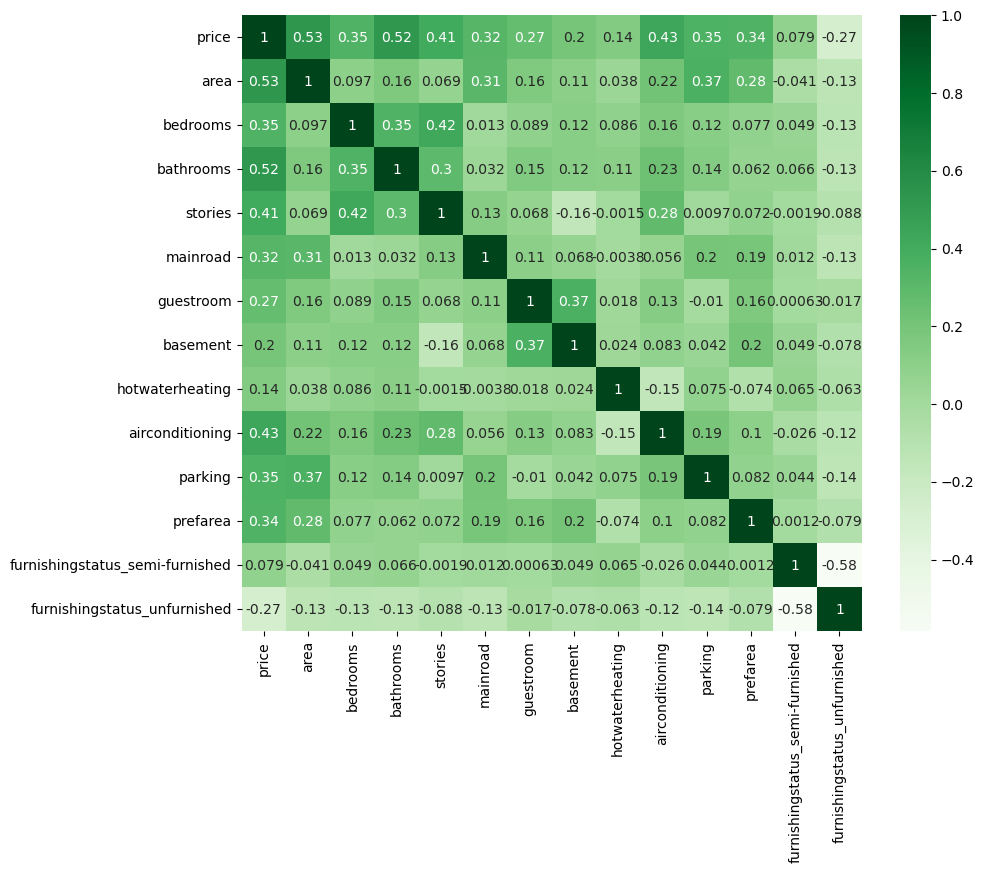

In [14]:
# plot heatmap to check the correlations

plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='Greens')
plt.show()

To build the model we will follow, the backward approach... 

**Iteration 1: train the model with all the variables**

In [15]:
# construct X_train and y_train

y_train = train_data['price']
X_train = train_data.drop(columns=['price'])
X_train_sm = sm.add_constant(X_train)

# train the model in training data

model = sm.OLS(y_train, X_train_sm).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           8.83e-83
Time:                        10:19:21   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0200      0.021      0.955      0.340      -0.021       0.061
area                                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms                            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms                           0.1908      0.022      8.679      0.000       0.148       0.234
stories                             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad                            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom                           0.0304      0.014      2.233      0.026       0.004       0.057
basement                            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating                     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning                     0.0669      0.011      5.899      0.000       0.045       0.089
parking                             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea                            0.0594      0.012      5.040      0.000       0.036       0.083
furnishingstatus_semi-furnished     0.0009      0.012      0.078      0.938      -0.022       0.024
furnishingstatus_unfurnished       -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will use or reject this model on the basis of p-value and the VIF of variables. VIF is given by

$$VIF = \frac {1}{(1-Ri^{2})} $$

To compute the VIF we will use the statsmodels library.

In [16]:
# compute vif

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = vif['VIF'].apply(lambda x: round(x, 3))
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,bedrooms,7.334
4,mainroad,6.022
0,area,4.672
3,stories,2.701
11,furnishingstatus_semi-furnished,2.188
9,parking,2.123
6,basement,2.015
12,furnishingstatus_unfurnished,1.823
8,airconditioning,1.771
2,bathrooms,1.667


**Iteration 2: Remove high p-value variable(furnishingstatus_semi-furnished, p-value = 0.938)**

In [17]:
# construct X_train and y_train

y_train = train_data['price']
X_train = train_data.drop(columns=['price', 'furnishingstatus_semi-furnished'])
X_train_sm = sm.add_constant(X_train)

# train the model in training data

model = sm.OLS(y_train, X_train_sm).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.07e-83
Time:                        10:19:21   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0207      0.019      1.098      0.273      -0.016       0.058
area                             0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms                         0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms                        0.1909      0.022      8.697      0.000       0.148       0.234
stories                          0.1085      0.019      5.669      0.000       0.071       0.146
mainroad                         0.0504      0.014      3.524      0.000       0.022       0.079
guestroom                        0.0304      0.014      2.238      0.026       0.004       0.057
basement                         0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating                  0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning                  0.0668      0.011      5.923      0.000       0.045       0.089
parking                          0.0608      0.018      3.372      0.001       0.025       0.096
prefarea                         0.0594      0.012      5.046      0.000       0.036       0.083
furnishingstatus_unfurnished    -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# compute vif

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = vif['VIF'].apply(lambda x: round(x, 3))
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,bedrooms,6.587
4,mainroad,5.675
0,area,4.670
3,stories,2.689
9,parking,2.123
6,basement,2.012
8,airconditioning,1.767
2,bathrooms,1.666
10,prefarea,1.505
5,guestroom,1.469


**Iteration 3: Remove bedrooms, as it has high p-value = 0.206**

In [19]:
# construct X_train and y_train

y_train = train_data['price']
X_train = train_data.drop(columns=['price', 'furnishingstatus_semi-furnished', 'bedrooms'])
X_train_sm = sm.add_constant(X_train)

# train the model in training data

model = sm.OLS(y_train, X_train_sm).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           2.73e-84
Time:                        10:19:21   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0357      0.015      2.421      0.016       0.007       0.065
area                             0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms                        0.1965      0.022      9.132      0.000       0.154       0.239
stories                          0.1178      0.018      6.654      0.000       0.083       0.153
mainroad                         0.0488      0.014      3.423      0.001       0.021       0.077
guestroom                        0.0301      0.014      2.211      0.028       0.003       0.057
basement                         0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating                  0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning                  0.0665      0.011      5.895      0.000       0.044       0.089
parking                          0.0629      0.018      3.501      0.001       0.028       0.098
prefarea                         0.0596      0.012      5.061      0.000       0.036       0.083
furnishingstatus_unfurnished    -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# compute vif

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = vif['VIF'].apply(lambda x: round(x, 3))
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,mainroad,4.792
0,area,4.546
2,stories,2.226
8,parking,2.103
5,basement,1.871
7,airconditioning,1.765
1,bathrooms,1.609
9,prefarea,1.504
4,guestroom,1.463
10,furnishingstatus_unfurnished,1.332


After 3 iterations we can see that the VIF value of all the features are less than 5 and thier p-values are also very small(~0). So we can conclude that this is our final model.

### Residual analysis

- Error terms are normally distributed with 0 mean.
- Error terms are independent of each other.
- Coefficents are linearly dependent.
- Error terms has a constant variance.

In [21]:
y_train_pred = model.predict(X_train_sm)

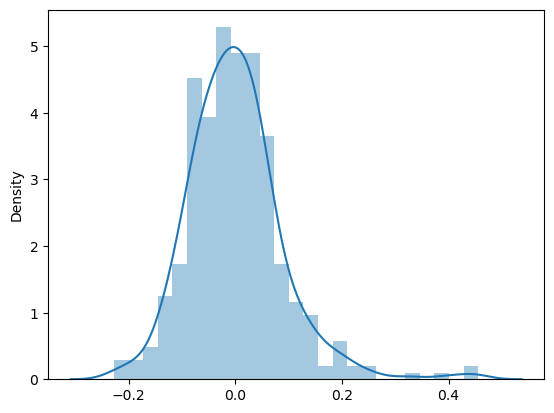

In [22]:
error_term = y_train - y_train_pred

sns.distplot(error_term)
plt.show()

### Prediction on test data

In [23]:
# rescale the test data using min-max scaling with trained scaler

test_data[numeric_vars] = scaler.transform(test_data[numeric_vars])
test_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [24]:
test_data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# construct X_test and y_test
y_test = test_data['price']
X_test = test_data.drop(columns=['price', 'bedrooms', 'furnishingstatus_semi-furnished'])
X_test_sm = sm.add_constant(X_test)

In [26]:
# prediction

y_test_pred = model.predict(X_test_sm)

In [30]:
# compute r-squared

r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
round(r2, 3)

0.671

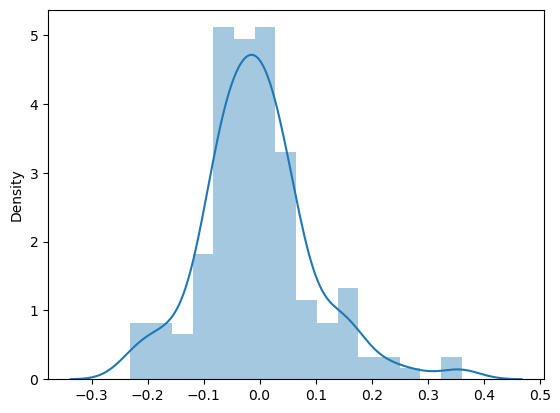

In [31]:
# residual analysis on test data

err_terms = y_test - y_test_pred
sns.distplot(err_terms)
plt.show()

In [32]:
model.params

const                           0.035722
area                            0.234746
bathrooms                       0.196480
stories                         0.117751
mainroad                        0.048798
guestroom                       0.030097
basement                        0.023917
hotwaterheating                 0.086403
airconditioning                 0.066533
parking                         0.062872
prefarea                        0.059643
furnishingstatus_unfurnished   -0.032317
dtype: float64